# **CREDIT CARD TRANSACTION FRAUD DETECTION**

## **# Import all libraries**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# **# Read and Explore data**

df_test = pd.read_csv('C:\\Users\\Harsh\\Downloads\\Genre Classification Dataset')
df_train = pd.read_csv('C:\\Users\\Harsh\\Downloads\\Genre Classification Dataset')

In [119]:
df=pd.read_csv('/content/fraudTest.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [120]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,27235.000000,2.723500e+04,27235.000000,27235.000000,27234.000000,27234.000000,2.723400e+04,2.723400e+04,27234.000000,27234.000000,27234.000000
mean,13617.000000,4.118996e+17,69.594138,48432.186782,38.550531,-90.008376,9.031500e+04,1.372195e+09,38.546098,-90.011074,0.004259
std,7862.211627,1.301391e+18,136.072715,26773.965282,5.055259,13.552173,3.060605e+05,2.417363e+05,5.092408,13.562147,0.065126
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.584303,0.000000
25%,6808.500000,1.800468e+14,9.570000,25526.000000,34.690200,-96.701000,7.540000e+02,1.371966e+09,34.776847,-96.731896,0.000000
50%,13617.000000,3.519233e+15,46.770000,48034.000000,39.390000,-87.349000,2.457000e+03,1.372195e+09,39.388537,-87.304704,0.000000
75%,20425.500000,4.634956e+15,82.945000,71960.000000,42.015800,-80.124800,2.032800e+04,1.372431e+09,41.982873,-80.153222,0.000000
max,27234.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372581e+09,66.669356,-66.955602,1.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27235 entries, 0 to 27234
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27235 non-null  int64  
 1   trans_date_trans_time  27235 non-null  object 
 2   cc_num                 27235 non-null  int64  
 3   merchant               27235 non-null  object 
 4   category               27235 non-null  object 
 5   amt                    27235 non-null  float64
 6   first                  27235 non-null  object 
 7   last                   27235 non-null  object 
 8   gender                 27235 non-null  object 
 9   street                 27235 non-null  object 
 10  city                   27235 non-null  object 
 11  state                  27235 non-null  object 
 12  zip                    27235 non-null  int64  
 13  lat                    27234 non-null  float64
 14  long                   27234 non-null  float64
 15  ci

In [122]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [123]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [124]:
df['lat'].fillna(df['lat'].mean(),inplace=True)
df['long'].fillna(df['long'].mean(),inplace=True)

In [125]:
df.sample(4)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
20618,2020-06-28 15:47:57,4900628639996,fraud_Schuppe-Schuppe,food_dining,107.64,Michael,Johnson,M,094 Owens Underpass,Norwalk,...,33.9056,-118.0818,105549.0,Firefighter,1973-09-22,50fc03929df513fb52b85cdf409e4cbf,1.372434e+09,32.993705,-118.059493,0.0
6408,2020-06-23 02:33:07,377550167323848,fraud_Kihn-Schuster,food_dining,136.31,Kevin,Walters,M,87227 Tapia Burgs,Auburn,...,44.0948,-70.2390,23045.0,Tourist information centre manager,1958-09-02,85de12ad5c0c44a4b636424f382c7779,1.371955e+09,44.275348,-70.701110,0.0
17832,2020-06-27 17:15:57,5501083170975659,fraud_Ziemann-Waters,health_fitness,33.33,Wayne,Payne,M,587 Bradley Inlet Suite 281,Cuyahoga Falls,...,41.1464,-81.5107,47772.0,Equities trader,1966-01-04,255604646ca4e03fcac15afbfef0de6d,1.372353e+09,40.913019,-82.146888,0.0
8049,2020-06-23 14:22:12,4998109455173950,fraud_Botsford and Sons,home,34.25,Mary,Pruitt,F,2819 Luke Greens Suite 563,Kansas City,...,38.9621,-94.5959,545147.0,Counsellor,1987-11-18,e8299cd84e42cf57c6483cb7db3cd296,1.371997e+09,38.231150,-94.731211,0.0


In [126]:
df.drop(['trans_date_trans_time','first','last','street','state','city','city_pop','job','dob','unix_time','trans_num'],axis=1,inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,33.986391,-81.200714,0.0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,39.450498,-109.960431,0.0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,40.495810,-74.196111,0.0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,28.812398,-80.883061,0.0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,44.959148,-85.884734,0.0


# **# Data Visualization**

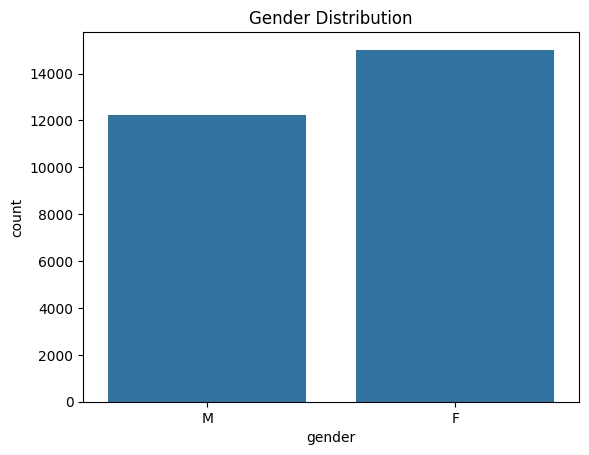

In [127]:
sns.countplot(x='gender',data=df)
plt.title('Gender Distribution')
plt.show()

# **# Data processing**

In [128]:
df.isnull().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
zip,0
lat,0
long,0
merch_lat,1
merch_long,1


In [129]:
df['merch_lat'].fillna(df['merch_lat'].mean(),inplace=True)
df['merch_long'].fillna(df['merch_long'].mean(),inplace=True)
df['is_fraud'].fillna(df['is_fraud'].mean(),inplace=True)

In [130]:
encoder=LabelEncoder()
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df['gender']=encoder.fit_transform(df['gender'])
df.sample(3)

,cc_num,merchant,category,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud
2059,180072527505094,431,9,5.20,1,28117,35.5840,-80.8685,35.656116,-80.481836,0.0
4819,501802953619,319,10,29.50,1,96037,41.5403,-122.9366,42.046499,-122.188076,0.0
3442,4710792708725663,563,4,45.26,1,46723,41.2290,-85.3244,41.748176,-85.798748,0.0


In [131]:
x=df.drop(['is_fraud'],axis=1)
y=df['is_fraud']

In [132]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

# **# Train LogisticRegression model**

In [133]:
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
lr_pred=lr_model.predict(xtest)

In [142]:
lr_model.score(xtest,lr_pred)

1.0

# **# Train DecisionTree model**

In [139]:
dt_model=DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [140]:
dt_pred=dt_model.predict(xtest)

In [143]:
dt_model.score(xtest,dt_pred)

1.0